K-MEANS CLUSTERING

IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

IMPORTING THE DATASETS

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:,[3,4]].values

print(dataset)
print("\n\nX VALUES: \n")
print(X)

     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


X VALUES: 

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94

USING THE ELBOW METHOD TO FIND THE OPTIMAL NUMBER OF CLUSTERS

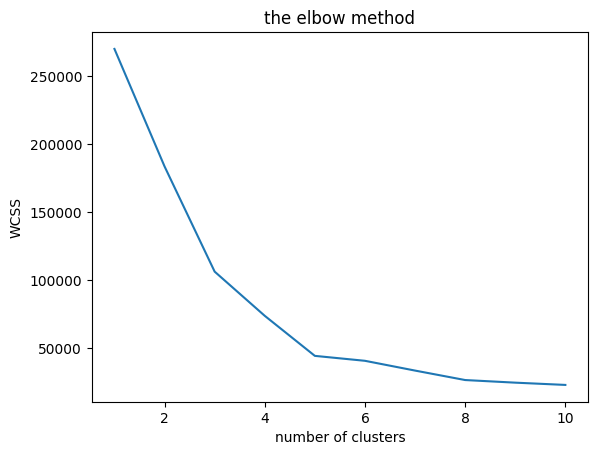

In [3]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1 , 11):
  kmeans = KMeans(n_clusters = i , init = 'k-means++' , random_state = 42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('the elbow method')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()


USING THE K-MEANS MODEL TO ON THE DATASET

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5 , init = 'k-means++' , random_state = 42)
y_kmeans = kmeans.fit_predict(X)

print(y_kmeans)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


VISUALISING THE CLUSTER

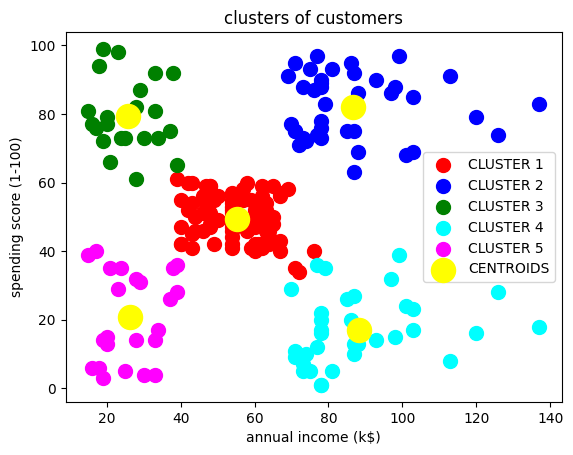

In [5]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'CLUSTER 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'CLUSTER 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'CLUSTER 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'CLUSTER 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'CLUSTER 5')
plt.scatter(kmeans.cluster_centers_[: , 0], kmeans.cluster_centers_[: , 1], s = 300, c = 'yellow', label = 'CENTROIDS')
plt.title('clusters of customers')
plt.xlabel('annual income (k$)')
plt.ylabel('spending score (1-100)')
plt.legend()
plt.show()



In [6]:
from sklearn.metrics import silhouette_score
print("silhouette score:", silhouette_score(X, y_kmeans))

silhouette score: 0.553931997444648
